## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

In [1]:
!pip install -U "tensorflow==2.20.0"

## Paso 2: Importar las librerías necesarias

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10  # pyright: ignore[reportMissingImports]

# Para que las imagenes aparezcan al medio del Notebook
%matplotlib inline
tf.__version__

'2.20.0'

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [3]:
# Configurar el nombre de las clases del dataset (Nombre de las 10 categorias)
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [4]:
# Cargar el dataset separado en entrenamiento y testing tanto para X e Y.
# Las X contendran imagenes a color y la Y las 10 categorias
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalización de las imágenes

In [5]:
# Para que entrene mas rapido lo dividiremos por el numero maximo de pixeles
X_train = X_train / 255.0

In [6]:
# Este dataset cuenta con 4 dimensiones
X_train.shape

(50000, 32, 32, 3)

* 50000 corresponde a 50.000 imagenes
* 32 corresponde a 32 pizeles de ancho
* 32 corresponde a 32 pizeles de alto
* 3 corresponde a los 3 canales de color RGB

In [7]:
# Dividiremos el test para que quede escalado tambien entre 0 y 1
X_test = X_test / 255.0

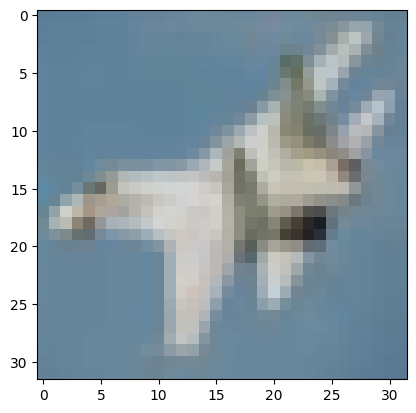

In [8]:
# Mostraremos a traves del plt la imagen 10 del conjunto de testing que corresponde a un avion
plt.imshow(X_test[10])

In [9]:
# Para comprobar que es un avion podemos consultar el indice 10 del y_test
y_test[10]

array([0], dtype=uint8)

* Nos devuelve que esta en la posicion 0
* Que si lo revisamos:
    * class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']
    * Vemos que la posicion 0 correspode al avion

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [10]:
model = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- input_shape: (32, 32, 3), las imagenes ya no son vector, por lo tanto se le especifica que tiene 32x32 pixeles y 3 canales de color
- Filtros: 32
- Tamaño del kernel: 3 (3 puntos en horizontal y vertical)
    - En el fondo tenemos 32 filtros o kernel de tamaño 3x3
- padding: same (margen iguales, se autocompleta con 0)
- Función de Activación: relu


In [11]:
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                 padding="same", activation="relu"))

### Añadir una segunda capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

In [12]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))


Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
    - Lo que hacemos es que de una ventana de 2x2 nos quedaremos con el valor mas alto
- padding: valid (No rellenamos con 0 las columnas faltantes)

In [13]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64 (añadiremos el doble de filtros)
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

In [15]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [16]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening (Aplanado)

In [17]:
model.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected (Completamente conectada)

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128 (128 neuronas de la capa oculta)
- activation: relu

In [18]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:
 - Debemos clasificar en uno de los 10 casos (categorias)
 - units/neurons: 10 (number of classes)
 - activation: softmax (Probabilidad de cada una de las categorias)


In [19]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [20]:
# Mostramos los parametros del modelo RN
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## Resumen
- Partimos con 896 pixeles
- Tras aplicar filtros en la capa densa terminamos con 524.416 parametros  

### Compilar el modelo

- Loss: sparse_categorical_crossentropy (Ya que es una de 10 posibles categorias)
- Optimizador: Adam
- Metrica: sparse_categorical_accuracy (Precision ya que comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [22]:
# Con el metodo fit entrenamos el modelo, pasandole las 50.000 imagenes en primer lugar (X_train)
# A cada una de esas imagenes le pasamos la clasificacion y_train (A que categoria pertenece)
# Realizamos 5 pasadas
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 1.6405 - sparse_categorical_accuracy: 0.4015
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.9639 - sparse_categorical_accuracy: 0.6629
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.7374 - sparse_categorical_accuracy: 0.7423
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6008 - sparse_categorical_accuracy: 0.7901
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.5011 - sparse_categorical_accuracy: 0.8236


### Evaluar el modelo

In [23]:
# Del modelo llamamos al meto evaluate, pasandole todas las imagenes de testing que NO han sido utilizadas para entrenar y se compare con la clasificacion del y_test
# Esto generará 2 variables, perdidas en el test (test_loss) y la precision del test (test_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7563 - sparse_categorical_accuracy: 0.7475


- Podemos apreciar que las 3/4 partes se han catalogado bien, un 75%

In [25]:
print("Precision del Test: {}".format(test_accuracy))

Precision del Test: 0.7443000078201294
